#### Groupby

> - SQL groupby 명령어와 같은
> - split -> apply -> combine 과정을 거쳐 연산
> - 한 개 이상의 column을 묶을 수 있음
> - ```Python
    # 묶음의 기준이 되는 컬럼 / 적용받는 컬럼 / 적용받는 연산
    df.groupby["Team"]["Points"].sum()
    ```

> - #### Hirearchical index
> - 두 개의 column으로 groupby를 할 경우, index가 두개 생성
> - **`unstack()`**을 통해 묶여진 데이터를 matrix 형태로 전환 가능
> - **`reset_index()`** 또한 가능
> - **`swaplevel()`** : Index level 변경 가능
> - **`sort_index(level=1)`** : level=1 기준으로 인덱스 정렬
> - Index level 기준으로 기본 연산 수행 가능
    - `sum`, `std`, ...
    
> - Groupby에 의해 Split된 상태 추출 가능
> - ```Python
    # Tuple 형태로 그룹의 key, value 값이 추출됨
    grouped = df.groupby["Team"]
    ```
> - **`get_group("Devils")`** : 특정 key값을 가진 그룹의 정보만 추출 가능
> - 추출된 group 정보에는 세 가지 유형의 apply 적용 가능
> - **Aggregation** : 요약된 통계정보를 추출해 줌
    - ```Python
    grouped.agg([sum, max])
    ```
> - **Transformation** : 해당 정보를 변환해줌
    - Aggregation과 달리 key값별로 요약된 정보가 아님
    - 개별 데이터의 변환을 지원함
    - ```Python
    score = lambda x: (x - x.mean()) / x.std()
    grouped.transform(score)
    ```
> - **Filteration** : 특정 정보를 제거 하여 보여주는 필터링 기능
    - filter안에는 boolean 조건이 존재해야함
    - len(x)는 grouped된 dataframe 개수
    - ```Python
    df.groupby("Team").filter(lambda x: len(x) >= 3)
    ```

In [14]:
import pandas as pd
import dateutil

df_phone = pd.read_csv("phone_data.csv")
# object to datetime
df_phone["date"] = df_phone["date"].apply(dateutil.parser.parse, dayfirst=True)
df_phone.head(2)

,index,date,duration,item,month,network,network_type
0,0,2014-10-15 06:58:00,34.429,data,2014-11,data,data
1,1,2014-10-15 06:58:00,13.000,call,2014-11,Vodafone,mobile


<AxesSubplot:xlabel='month'>

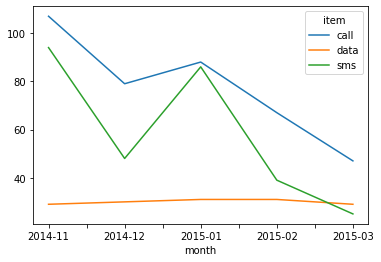

In [22]:
df_phone.groupby(["month", "item"])["duration"].count().unstack().plot()

In [35]:
# as_index : reset_index와 동일한 기능
# add_prefix : oolumn 앞에 동일한 문자 추가
df_phone.groupby("month", as_index=False).agg({"duration": "sum", "index": "count"}).add_prefix("phone_")

,phone_month,phone_duration,phone_index
0,2014-11,26639.441,230
1,2014-12,14641.870,157
2,2015-01,18223.299,205
3,2015-02,15522.299,137
4,2015-03,22750.441,101


#### Pivot Table

> - Excel에서 보던 것
> - Index 축은 groupby와 동일함
> - Column에 추가로 labeling 값을 추가해 Value에 numeric type 값을 aggregation 하는 형태

In [43]:
# df_phone.groupby(["month", "item", "network"])["duration"].sum().unstack().fillna(0)
df_phone.pivot_table(
    values = ["duration"],
    index = [df_phone.month, df_phone.item],
    columns = df_phone.network,
    aggfunc = "sum", 
    fill_value = 0    
)

duration                                                   \
network        Meteor Tesco  Three Vodafone      data landline special   
month   item                                                             
2014-11 call     1521  4045  12458     4316     0.000     2906       0   
        data        0     0      0        0   998.441        0       0   
        sms        10     3     25       55     0.000        0       1   
2014-12 call     2010  1819   6316     1302     0.000     1424       0   
        data        0     0      0        0  1032.870        0       0   
        sms        12     1     13       18     0.000        0       0   
2015-01 call     2207  2904   6445     3626     0.000     1603       0   
        data        0     0      0        0  1067.299        0       0   
        sms        10     3     33       40     0.000        0       0   
2015-02 call     1188  4087   6279     1864     0.000      730       0   
        data        0     0      0        0  1067.299        0       0   
        sms         1     2     11       23     0.000        0       2   
2015-03 call      274   973   4966     3513     0.000    11770       0   
        data        0     0      0        0   998.441        0       0   
        sms         0     4      5       13     0.000        0       0   

                              
network      voicemail world  
month   item                  
2014-11 call       301     0  
        data         0     0  
        sms          0     0  
2014-12 call       690     0  
        data         0     0  
        sms          0     4  
2015-01 call       285     0  
        data         0     0  
        sms          0     0  
2015-02 call       268     0  
        data         0     0  
        sms          0     0  
2015-03 call       231     0  
        data         0     0  
        sms          0     3

#### Crosstab

> - 두 column의 교차 빈도, 비율, 덧셈 등을 구할 때 사용
> - Pivot table의 특수한 형태
> - User-Item Rating Matrix 등을 만들 때 사용 가능

#### Merge & Concat

> - #### Merge
> - SQL에서 많이 사용하는 Merge와 같은 기능
> - 두 개의 데이터를 하나로 합침

> - #### Concat
> - 같은 형태의 데이터를 붙이는 연산작업
> - ```Python
    # concat과 같은 역할
    df1.append(df2)
    ```
    
#### Persistence

> - #### Database connection
> - Data loading시 db connection 기능을 제공함
> - `sqllte3`

> - #### XLS persistence
> - Dataframe의 엑셀 추출 코드
> - Xls 엔진으로 openpyxls 또는 XlsxWrite 사용